# Runge-kutta for Lorenz96 -hybrid

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### We define the Runge-kutta of 4th order

In [2]:
def RK4_step(f,t,y,h):
    k1 = h*f(t,y)
    k2 = h*f(t+0.5*h, y+0.5*k1)
    k3 = h*f(t+0.5*h, y+0.5*k2)
    k4 = h*f(t+h, y+k3)
    return y+(k1+2*k2+2*k3+k4)/6

### Simulation of empirical values:
We simulate the empirical values of the model by adding a parameter $\epsilon$. With this parameter, we can simulate the differential equations in an approximate manner. The results that we obtain are what we consider as empirical values of the system

In [3]:

def L96(t, v):
    """Lorenz 96 model with constant forcing"""
    # definimos un tensor con ceros
    dvdt = 0*v
    epsilon = 0.05
    # iteraciona sobre los indices
    for i in range(N):
        dvdt[i] = (v[(i + 1)%N] - v[i - 2]) * v[i - 1] - (1+epsilon)*v[i] + F
        
    return dvdt


In [4]:
%%time

N = 8 
F = 8  

t0=0
tn=5000 
h=0.005 

time = np.arange(t0, tn, h)


v = np.zeros([len(time),N], float)
v[0] +=F
v[0,0] += 0.5 


for i in range(len(time)-1):
    v[i+1] = RK4_step(L96,time[i],v[i],h)
v.shape


CPU times: user 1min 19s, sys: 753 ms, total: 1min 20s
Wall time: 1min 20s


(1000000, 8)

### We apply a standarization technique:

The scaling of variables is used so that supervised machine learning models, such as Deep Learning, do not have a tendency towards a specific range of values. Scaling the variables standardizes the characteristics of the values.

StandardScaler: This standardization technique is used to center feature columns with a mean of 0 and a standard deviation of 1, so that the feature columns have the same parameters as a standard normal distribution.

In [5]:
scaler = StandardScaler()
data_scaler = scaler.fit_transform(v)
print(data_scaler)
data_scaler.shape

df=pd.DataFrame(data_scaler)


[[ 1.76118706  1.6068029   1.61830241 ...  1.60794015  1.60751169
   1.62512733]
 [ 1.75986624  1.60599583  1.612074   ...  1.60737559  1.60705553
   1.63026189]
 [ 1.75852424  1.60471686  1.60591174 ...  1.60682209  1.60681738
   1.63533796]
 ...
 [-0.73679898 -0.95859864 -0.13315888 ... -0.90719966  0.08570476
   0.66059238]
 [-0.74929225 -0.94462586 -0.13933444 ... -0.92638509  0.09102211
   0.66743742]
 [-0.76163672 -0.93053233 -0.14483941 ... -0.94427802  0.09597011
   0.67434632]]


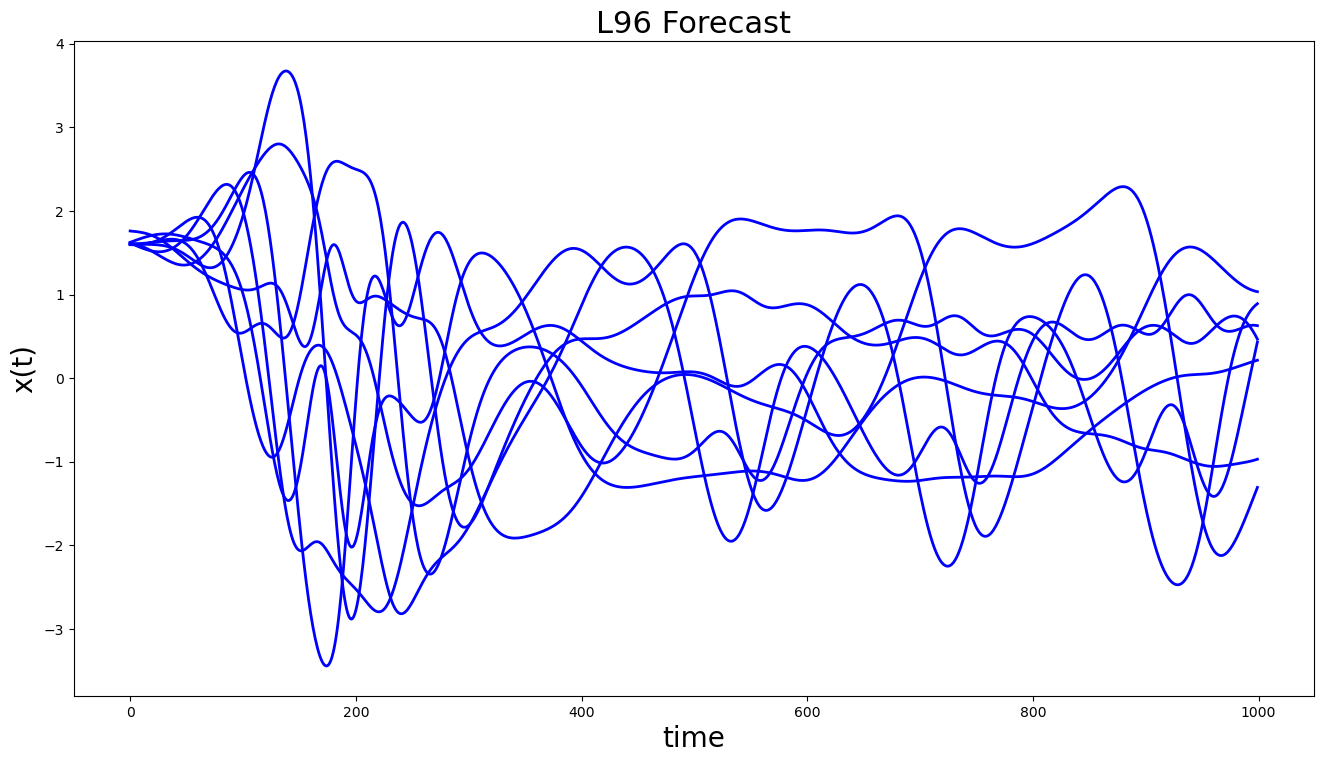

In [6]:
plt.figure (figsize = (16,8.5))
#for i in range(N):
plt.plot (data_scaler[:1000,:], linewidth = 2, color = 'b')
plt.title('L96 hybird Forecast',fontsize=22)
plt.xlabel("time",fontsize=20)
plt.ylabel("x(t)",fontsize=20)
plt.show() 